<a href="https://colab.research.google.com/github/JoshFowles/IS-4487-Spring-2023/blob/main/Module4_Script_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [2]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/retail_dataset.csv')

Mounted at /content/gdrive


In [4]:
#look at the top rows
df.head(10) 

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June
5,351,Glenn Reville,3 Springview Drive,Dallas,TX,75277.0,1006,2020-02-18,351,1006,106,4.0,106,Great value Juice,$1.99,$7.96,2020-02,February
6,233,Cosette Berkowitz,7619 Susan Lane,South Bend,IN,46634.0,1007,2019-10-25,233,1007,105,2.0,105,Office Chair,$55.99,$111.98,2019-10,October
7,121,Nisse Cunniam,0 Dennis Pass,Lincoln,NE,68531.0,1008,2019-11-10,121,1008,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,2019-11,November
8,232,Yank Eayrs,8176 Lawn Drive,Washington,DC,20575.0,1009,2019-09-27,232,1009,110,1.0,110,Apple iPad Mini,$329.99,$329.99,2019-09,September
9,113,Jamesy Brothwood,0693 Evergreen Pass,Scranton,PA,18514.0,1010,2019-09-02,113,1010,108,1.0,108,Printer,$59.99,$59.99,2019-09,September


In [5]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [6]:
#describe the data before cleaning it
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


In [7]:
dfBad = df[df.isnull().any(axis=1)]
dfBad

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
5730,435,Kennith Cake,30917 Starling Hill,Orlando,Florida,32825.0,6052,NaN,435,6052,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,NaN,NaN
5741,297,Lucita O'Callaghan,6 South Drive,San Francisco,CA,94142.0,6063,NaN,297,6063,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,NaN,NaN
5748,704,Val Ellsbury,75253 Bultman Crossing,NaN,Colorado,80127.0,6071,2019-06-29,704,6071,106,18.0,106,Great value Juice,$1.99,$35.82,2019-06,June
5749,793,Britni Heinemann,629 Old Shore Drive,Baton Rouge,Louisiana,NaN,6072,2020-05-29,793,6072,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,2020-05,May
5755,437,Sumner Plastow,05 Bunting Hill,Norwalk,Connecticut,6854.0,6080,NaN,437,6080,106,7.0,106,Great value Juice,$1.99,$13.93,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,724,Karlotte Beste,5819 Sage Terrace,NaN,Florida,33462.0,8128,2021-05-14,724,8128,111,3.0,111,Printer Ink Cartridge,$39.99,$119.97,2021-05,May
9558,656,Emmerich Privost,NaN,Washington,District of Columbia,56944.0,8137,2021-01-17,656,8137,111,8.0,111,Printer Ink Cartridge,$39.99,$319.92,2021-01,January
9562,782,Edmund Hugues,814 Scott Terrace,Kansas City,Missouri,64136.0,8141,2021-01-20,782,8141,110,NaN,110,Apple iPad Mini,$329.99,NaN,2021-01,January
9563,722,Marwin Darrigoe,22 South Crossing,Houston,Texas,NaN,8142,2021-08-26,722,8142,109,1.0,109,Samsung Galaxy Note 10,$749.99,$749.99,2021-08,August


In [9]:
df['state_province'].unique()

array(['DE                       ', 'AL                       ',
       'CA                       ', 'VA                       ',
       'TX                       ', 'IN                       ',
       'NE                       ', 'DC                       ',
       'PA                       ', 'IA                       ',
       'MO                       ', 'LA                       ',
       'AK                       ', 'MN                       ',
       'TN                       ', 'NC                       ',
       'NV                       ', 'CT                       ',
       'MI                       ', 'NY                       ',
       'CO                       ', 'FL                       ',
       'AZ                       ', 'SC                       ',
       'ND                       ', 'NM                       ',
       'MS                       ', 'OH                       ',
       'MD                       ', 'KS                       ',
       'IL               

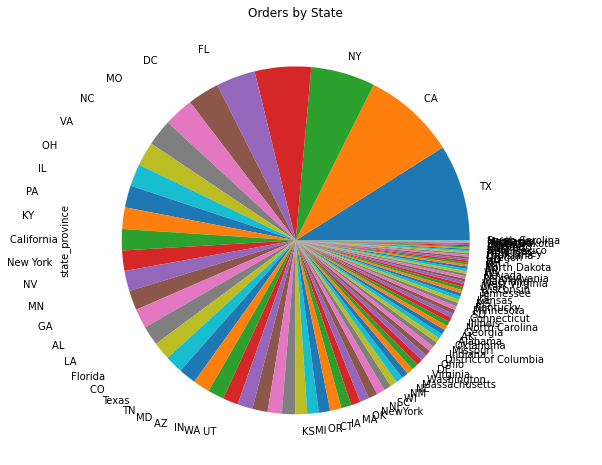

In [12]:
dfFresh = df.dropna()

Visual = dfFresh['state_province'].value_counts().plot(kind='pie', figsize=(20,8), title="Orders by State")

## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [ ]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna() 

df_clean.describe()